In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
SHORT_TIME = 'short_time'
LONG_TIME = 'long_time'

SHORT_TIME_OR_LONG_TIME = SHORT_TIME

In [4]:
HORIZON = 48 if SHORT_TIME_OR_LONG_TIME == SHORT_TIME else 168

In [5]:
# Dateipfad angeben
file_path = f'/content/drive/My Drive/BA/passantenzaehlung_stundendaten_features_{SHORT_TIME_OR_LONG_TIME}.csv'

# Datei einlesen timestamp soll as datetime eingelesen werden und in utc
df_hour = pd.read_csv(file_path, parse_dates=['timestamp'])
df_hour['timestamp'] = pd.to_datetime(df_hour['timestamp'], utc=True)

df_hour.head()



,timestamp,temperature,pedestrians_count,location,special_event,holidays,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,...,temperature_forecast_6,train_7,test_7,temperature_forecast_7,train_8,test_8,temperature_forecast_8,train_9,test_9,temperature_forecast_9
0,2024-01-08 00:00:00+00:00,-1.6,47.0,Kaiserstraße,False,False,False,True,False,False,...,NaN,True,False,NaN,True,False,NaN,True,False,NaN
1,2024-01-08 00:00:00+00:00,-1.6,13.0,Schönbornstraße,False,False,False,True,False,False,...,NaN,True,False,NaN,True,False,NaN,True,False,NaN
2,2024-01-08 00:00:00+00:00,-1.6,24.0,Spiegelstraße,False,False,False,True,False,False,...,NaN,True,False,NaN,True,False,NaN,True,False,NaN
3,2024-01-08 01:00:00+00:00,-2.0,10.0,Kaiserstraße,False,False,False,True,False,False,...,NaN,True,False,NaN,True,False,NaN,True,False,NaN
4,2024-01-08 01:00:00+00:00,-2.0,16.0,Schönbornstraße,False,False,False,True,False,False,...,NaN,True,False,NaN,True,False,NaN,True,False,NaN


In [6]:
# one hot encode location

df_hour = pd.get_dummies(df_hour, columns=['location'])

df_hour.columns


Index(['timestamp', 'temperature', 'pedestrians_count', 'special_event',
       'holidays', 'weekday_Friday', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'hour_sin', 'hour_cos', 'hour_0', 'hour_1',
       'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8',
       'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14',
       'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20',
       'hour_21', 'hour_22', 'hour_23', 'pedestrians_count_7d_lag', 'train_1',
       'test_1', 'temperature_forecast_1', 'train_2', 'test_2',
       'temperature_forecast_2', 'train_3', 'test_3', 'temperature_forecast_3',
       'train_4', 'test_4', 'temperature_forecast_4', 'train_5', 'test_5',
       'temperature_forecast_5', 'train_6', 'test_6', 'temperature_forecast_6',
       'train_7', 'test_7', 'temperature_forecast_7', 'train_8', 'test_8',
       'temperature_forecast_8', 'train_9

In [7]:
num_test_sets = len([col for col in df_hour.columns if col.startswith('test_')])
num_test_sets

9

In [8]:
def get_train_i(i):
  return df_hour[df_hour['train_'+str(i)]]

def get_test_i(i):
  df_test = df_hour[df_hour['test_'+str(i)]].copy()
  # Replace the temperature colmn by the temperature_forecast_i column
  df_test['temperature'] = df_test['temperature_forecast_'+str(i)]
  return df_test

In [9]:
def get_location_name(df):

  df2 = df.copy()

  df2['location'] = ''
  df2.loc[df2['location_Kaiserstraße'] == 1, 'location'] = 'Kaiserstraße'
  df2.loc[df2['location_Schönbornstraße'] == 1, 'location'] = 'Schönbornstraße'
  df2.loc[df2['location_Spiegelstraße'] == 1, 'location'] = 'Spiegelstraße'

  return df2['location']

In [10]:
def format_dataset_for_nixtla(df):
    df = df.copy()
    # Add column unique_id that is the location name
    df['unique_id'] = get_location_name(df)
    # Rename date to ds and pedestrians_count to y
    df.rename(columns = {'timestamp':'ds', 'pedestrians_count':'y'}, inplace=True)
    df['ds'] = pd.to_datetime(df['ds'])
    # Drop the one hot encoded locations

    # Replace True with 1 and False with 0
    df.replace({True: 1, False: 0}, inplace=True)

    return df[futr_exog_list + ['ds', 'y', 'unique_id']].reset_index(drop=True)

In [11]:
df_hour.columns

Index(['timestamp', 'temperature', 'pedestrians_count', 'special_event',
       'holidays', 'weekday_Friday', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'hour_sin', 'hour_cos', 'hour_0', 'hour_1',
       'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8',
       'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14',
       'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20',
       'hour_21', 'hour_22', 'hour_23', 'pedestrians_count_7d_lag', 'train_1',
       'test_1', 'temperature_forecast_1', 'train_2', 'test_2',
       'temperature_forecast_2', 'train_3', 'test_3', 'temperature_forecast_3',
       'train_4', 'test_4', 'temperature_forecast_4', 'train_5', 'test_5',
       'temperature_forecast_5', 'train_6', 'test_6', 'temperature_forecast_6',
       'train_7', 'test_7', 'temperature_forecast_7', 'train_8', 'test_8',
       'temperature_forecast_8', 'train_9

In [12]:
futr_exog_list = ['special_event',
       'holidays', 'weekday_Friday', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'hour_0', 'hour_1',
       'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8',
       'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14',
       'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20',
       'hour_21', 'hour_22', 'hour_23', 'pedestrians_count_7d_lag']


static_feature_list = ['location_Kaiserstraße','location_Schönbornstraße','location_Spiegelstraße']

ml_features_list = futr_exog_list + static_feature_list

In [13]:
quantiles = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

In [14]:
# import the quantile loss function
from sklearn.metrics import mean_pinball_loss

def multi_quantile_loss(y_true, qdist, quantiles):
    """
    Custom loss function for multi-quantile regression.
    """
    return np.mean([mean_pinball_loss(y_true, qdist[q], alpha=q) for q in quantiles])


In [15]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


def mae_loss(y_true, qdist, quantiles):
    """
    Takes all quantile estimations as input and then calculates the MAE loss for the 50% quantile (median)
    The MAE loss is the mean absolute error between the true values and the predicted values.
    ´´´
    """
    return mean_absolute_error(y_true, qdist[0.5])



In [16]:
def post_process_quantiles(quantile_estimates: pd.DataFrame):
    """
    Post-process the distributional predictions that are the output of a quantile regression model.
    The predictions are in the form of a DataFrame with columns as quantiles.
    It could happen that the prediction for a higher quantile is lower than the prediction for a lower quantile.
    This function ensures that the predictions are monotonically increasing.
    """

    # Iterate over the columns
    for i in range(1, quantile_estimates.shape[1]):
        # Get the current and previous columns
        current_col = quantile_estimates.columns[i]
        prev_col = quantile_estimates.columns[i-1]

        # Ensure that the current column is greater than the previous column
        quantile_estimates[current_col] = np.maximum(quantile_estimates[current_col], quantile_estimates[prev_col])

    return quantile_estimates

In [17]:
def evaluate(quantile_estimates, i_test, horizon=168):

    df_train = get_train_i(i_test)
    df_test = get_test_i(i_test)

    val_y = df_test['pedestrians_count']

    quantile_estimates = post_process_quantiles(quantile_estimates)


    # Reduziere y auf den horizont
    val_y = val_y.iloc[:3*horizon]
    # Reduziere quantile_estimates auf den horizont
    quantile_estimates = quantile_estimates.iloc[:3*horizon, :]
    mq_loss_value = multi_quantile_loss(val_y, quantile_estimates, quantiles)

    mae_loss_value = mae_loss(val_y, quantile_estimates, quantiles)


    print(f'The multi quantile loss (MQL) is: {mq_loss_value:.2f}')
    print(f'The mean absolute error (MAE) is: {mae_loss_value:.2f}')

    return mq_loss_value, mae_loss_value





1. Empirische Verteilung

In [18]:
eval_df = pd.DataFrame(columns=['Method','Test Set', 'Horizon', 'MQL', 'MAE'])

In [19]:

for i in range(1, num_test_sets + 1):

    df_train = get_train_i(i)
    df_test = get_test_i(i)

    empirical_quantiles = df_train['pedestrians_count'].quantile(q=quantiles)
    empirical_quantiles = pd.DataFrame(
        data=(np.ones((len(df_test), len(empirical_quantiles.values))) * empirical_quantiles.values),
        columns=quantiles
        )
    mql, mae = evaluate(empirical_quantiles, horizon=HORIZON, i_test=i)
    eval_df.loc[len(eval_df)] = ['Empirical Quantiles', i, HORIZON, mql, mae]
    eval_df.loc

eval_df

The multi quantile loss (MQL) is: 246.10
The mean absolute error (MAE) is: 686.69
The multi quantile loss (MQL) is: 339.44
The mean absolute error (MAE) is: 869.74
The multi quantile loss (MQL) is: 256.21
The mean absolute error (MAE) is: 714.06
The multi quantile loss (MQL) is: 279.42
The mean absolute error (MAE) is: 715.76
The multi quantile loss (MQL) is: 269.94
The mean absolute error (MAE) is: 766.35
The multi quantile loss (MQL) is: 200.28
The mean absolute error (MAE) is: 527.33
The multi quantile loss (MQL) is: 446.76
The mean absolute error (MAE) is: 1150.01
The multi quantile loss (MQL) is: 177.38
The mean absolute error (MAE) is: 456.56
The multi quantile loss (MQL) is: 233.83
The mean absolute error (MAE) is: 656.24


,Method,Test Set,Horizon,MQL,MAE
0,Empirical Quantiles,1,48,246.096199,686.694444
1,Empirical Quantiles,2,48,339.443787,869.736111
2,Empirical Quantiles,3,48,256.211915,714.055556
3,Empirical Quantiles,4,48,279.418735,715.756944
4,Empirical Quantiles,5,48,269.941294,766.354167
5,Empirical Quantiles,6,48,200.275409,527.333333
6,Empirical Quantiles,7,48,446.761045,1150.006944
7,Empirical Quantiles,8,48,177.379496,456.562500
8,Empirical Quantiles,9,48,233.834481,656.243056


In [20]:
import torch
print(torch.cuda.is_available())


True


## 2. Quantilregression (Quantile Regression-Modell)

In [21]:
from sklearn.linear_model import QuantileRegressor


quantile_regression_dfs = {}


for i in range(1, num_test_sets + 1):

    quantile_regression_dfs[i] = pd.DataFrame(columns=quantiles)

    df_train = get_train_i(i)
    df_test = get_test_i(i)

    for q in quantiles:

        # Quantile Regression model considering only the following features
        # weekday, location

        model = QuantileRegressor(quantile=q, alpha=0, solver='highs', fit_intercept=False)
        model.fit(df_train[ml_features_list].astype(int), df_train['pedestrians_count'])
        quantile_regression_dfs[i][q] = model.predict(df_test[ml_features_list].astype(int))

quantile_regression_dfs

{1:            0.05        0.10        0.15        0.20        0.25        0.30  \
 0     20.120925   22.750842   27.141657   29.407379   31.284211   33.533917   
 1      8.654416   16.028620   23.143434   27.038798   29.989474   33.470460   
 2     -2.510966   11.335017   17.244710   20.147585   22.431579   24.722101   
 3     16.158269   17.473064   19.325796   20.036896   21.515789   22.498906   
 4      1.362774    5.690236    9.543208   11.335108   13.494737   15.404814   
 ..          ...         ...         ...         ...         ...         ...   
 139  140.698874  172.836700  187.385075  202.965766  214.378947  229.365427   
 140   91.065205  109.664983  114.644807  122.890833  129.094737  139.374179   
 141   -3.336692    4.080808    8.587143   11.038037   13.263158   14.501094   
 142  -13.693539   -0.954545    6.517041   10.780525   14.210526   16.781182   
 143  -31.147007  -15.207071  -10.307705   -8.073412   -6.052632   -5.247265   
 
            0.35        0.40       

In [22]:
for i in range(1, num_test_sets + 1):

    df_train = get_train_i(i)
    df_test = get_test_i(i)

    quantile_regression_df = quantile_regression_dfs[i]

    mql_qr, mae_qr = evaluate(quantile_regression_df, horizon=HORIZON, i_test=i)
    eval_df.loc[len(eval_df)] = ['Quantile Regression', i, HORIZON, mql, mae_qr]
    eval_df.loc

eval_df

The multi quantile loss (MQL) is: 48.78
The mean absolute error (MAE) is: 126.50
The multi quantile loss (MQL) is: 112.07
The mean absolute error (MAE) is: 277.82
The multi quantile loss (MQL) is: 59.08
The mean absolute error (MAE) is: 140.74
The multi quantile loss (MQL) is: 209.06
The mean absolute error (MAE) is: 493.55
The multi quantile loss (MQL) is: 45.22
The mean absolute error (MAE) is: 124.20
The multi quantile loss (MQL) is: 111.30
The mean absolute error (MAE) is: 302.67
The multi quantile loss (MQL) is: 118.12
The mean absolute error (MAE) is: 285.73
The multi quantile loss (MQL) is: 50.58
The mean absolute error (MAE) is: 127.48
The multi quantile loss (MQL) is: 81.90
The mean absolute error (MAE) is: 212.10


,Method,Test Set,Horizon,MQL,MAE
0,Empirical Quantiles,1,48,246.096199,686.694444
1,Empirical Quantiles,2,48,339.443787,869.736111
2,Empirical Quantiles,3,48,256.211915,714.055556
3,Empirical Quantiles,4,48,279.418735,715.756944
4,Empirical Quantiles,5,48,269.941294,766.354167
5,Empirical Quantiles,6,48,200.275409,527.333333
6,Empirical Quantiles,7,48,446.761045,1150.006944
7,Empirical Quantiles,8,48,177.379496,456.562500
8,Empirical Quantiles,9,48,233.834481,656.243056
9,Quantile Regression,1,48,233.834481,126.503587


### 3. LightGBM

In [23]:
pip install lightgbm

In [24]:
import lightgbm as lgb

lgb_dfs = {}


for i in range(1, num_test_sets + 1):

    lgb_dfs[i] = pd.DataFrame(columns=quantiles)

    df_train = get_train_i(i)
    df_test = get_test_i(i)


    for q in quantiles:

        # Define the model with quantiles
        model = lgb.LGBMRegressor(
            objective='quantile',
            alpha=q, # alpha Parameter gibt Quantil an
            random_state=42,
            verbose=-1
        )

        # Fit the model
        model.fit(df_train[ml_features_list], df_train['pedestrians_count'])

        # Predict the quantiles
        preds = model.predict(df_test[ml_features_list]) #Macht die vorhersagen auf Validierungsdaten

        # Save the predictions
        lgb_dfs[i][q] = preds  # Speichert die Vorhersagen für das aktuelle Quantil in der df lgb_dist

lgb_dfs

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


{1:            0.05        0.10        0.15        0.20        0.25        0.30  \
 0     19.320125   25.667684   27.394312   32.314369   35.209270   35.615428   
 1     15.994858   22.844417   23.786533   28.611485   32.061663   33.071361   
 2     17.574005   26.422648   25.979957   28.598497   30.861425   33.211843   
 3     11.638199   12.532669   14.077036   14.762877   16.297596   16.361121   
 4      8.142084   10.993856   12.201057   14.026916   15.714591   16.065648   
 ..          ...         ...         ...         ...         ...         ...   
 139  109.371870  153.307661  166.066067  175.793280  188.269186  206.566050   
 140   94.095943  113.443349  116.797730  122.011344  128.642729  136.583422   
 141    0.000159   -0.056411   -0.319995   -0.526323    0.076397    6.078148   
 142    0.000159   -0.100078   -1.941358   -0.671127    1.074305   11.958926   
 143    0.000159   -0.009270   -0.019374    0.032365   -0.000006   -0.000089   
 
            0.35        0.40       

In [25]:
for i in range(1, num_test_sets + 1):

    df_train = get_train_i(i)
    df_test = get_test_i(i)

    lgb_df = lgb_dfs[i]



    mql_lgb, mae_lgb = evaluate(lgb_df, horizon=HORIZON, i_test=i)
    eval_df.loc[len(eval_df)] = ['LightGBM', i, HORIZON, mql_lgb, mae_lgb]

eval_df

The multi quantile loss (MQL) is: 40.36
The mean absolute error (MAE) is: 107.78
The multi quantile loss (MQL) is: 91.24
The mean absolute error (MAE) is: 222.37
The multi quantile loss (MQL) is: 58.25
The mean absolute error (MAE) is: 147.65
The multi quantile loss (MQL) is: 155.95
The mean absolute error (MAE) is: 401.71
The multi quantile loss (MQL) is: 38.85
The mean absolute error (MAE) is: 105.74
The multi quantile loss (MQL) is: 64.13
The mean absolute error (MAE) is: 159.23
The multi quantile loss (MQL) is: 117.70
The mean absolute error (MAE) is: 286.94
The multi quantile loss (MQL) is: 36.25
The mean absolute error (MAE) is: 91.74
The multi quantile loss (MQL) is: 68.18
The mean absolute error (MAE) is: 177.22


,Method,Test Set,Horizon,MQL,MAE
0,Empirical Quantiles,1,48,246.096199,686.694444
1,Empirical Quantiles,2,48,339.443787,869.736111
2,Empirical Quantiles,3,48,256.211915,714.055556
3,Empirical Quantiles,4,48,279.418735,715.756944
4,Empirical Quantiles,5,48,269.941294,766.354167
5,Empirical Quantiles,6,48,200.275409,527.333333
6,Empirical Quantiles,7,48,446.761045,1150.006944
7,Empirical Quantiles,8,48,177.379496,456.562500
8,Empirical Quantiles,9,48,233.834481,656.243056
9,Quantile Regression,1,48,233.834481,126.503587


In [26]:
import numpy as np
import scipy.interpolate as interp
import matplotlib.pyplot as plt

def plot_cdf_pdf(pred, quantiles, number):
    """
    Function to interpolate the CDF and derive the PDF from the predicted quantiles using linear interpolation.

    Parameters:
    pred (array-like): Array of predicted values.
    quantiles (array-like): Array of quantiles corresponding to the predicted values.

    Returns:
    None: Plots the CDF and PDF of the distribution.
    """

    # Step 1: Interpolate the CDF using linear interpolation
    cdf_interp = interp.interp1d(quantiles, pred.iloc[0, :], kind='linear', fill_value="extrapolate")

    # Step 2: Derive the PDF by differentiating the interpolated CDF
    # Compute the finite difference approximation for the PDF (density)
    x_vals = np.linspace(0.05, 0.95, 500)  # Generate 500 points between quantile 0.05 and 0.95
    cdf_vals = cdf_interp(x_vals)
    pdf_vals = np.gradient(cdf_vals, x_vals)  # Numerical derivative of the CDF to get PDF

    # Plot CDF and PDF
    plt.figure(figsize=(12, 6))

    # Plot CDF
    plt.subplot(1, 2, 1)
    plt.plot(x_vals, cdf_vals, label='CDF', color='blue')
    plt.scatter(quantiles, pred.iloc[0, :], color='red', label='Quantiles')
    plt.title('CDF Interpolation')
    plt.xlabel('Quantiles')
    plt.ylabel('Forecasted Values')
    plt.legend()

    # Plot PDF
    plt.subplot(1, 2, 2)
    plt.plot(x_vals, pdf_vals, label='PDF', color='green')
    plt.title('PDF (Density)')
    plt.xlabel('Quantiles')
    plt.ylabel('Density')
    plt.legend()

    # Show plots
    plt.tight_layout()

    # Save the plot as a PNG file
    plt.savefig(f"/content/drive/My Drive/BA/CDF_hour_{number}.png")
    plt.show()

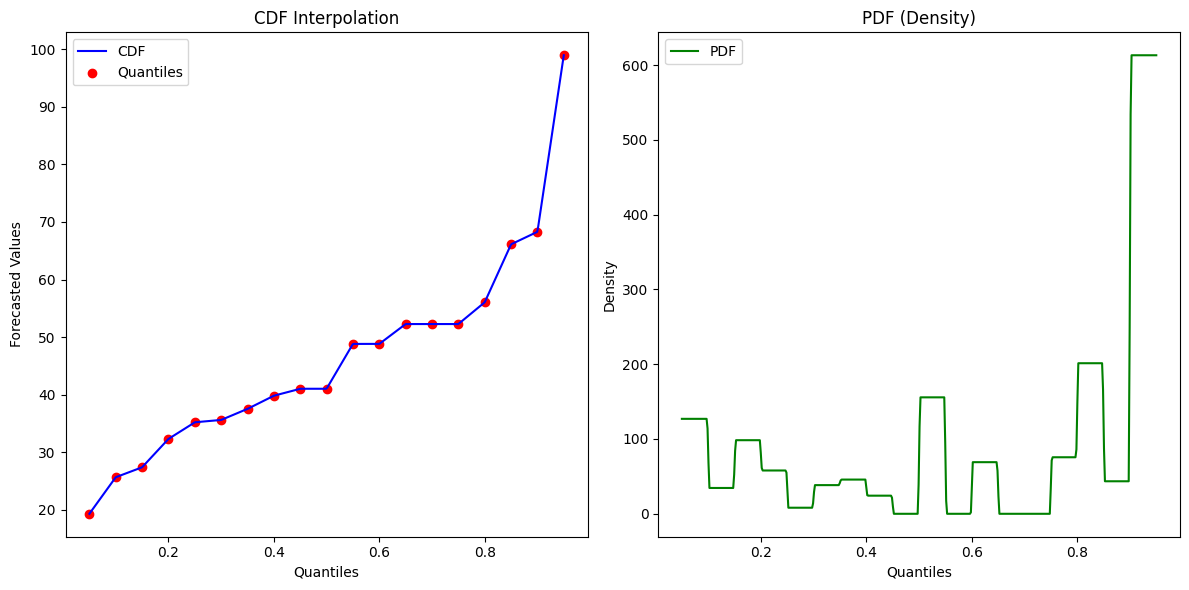

In [27]:
plot_cdf_pdf(lgb_dfs[1], quantiles, number=1)

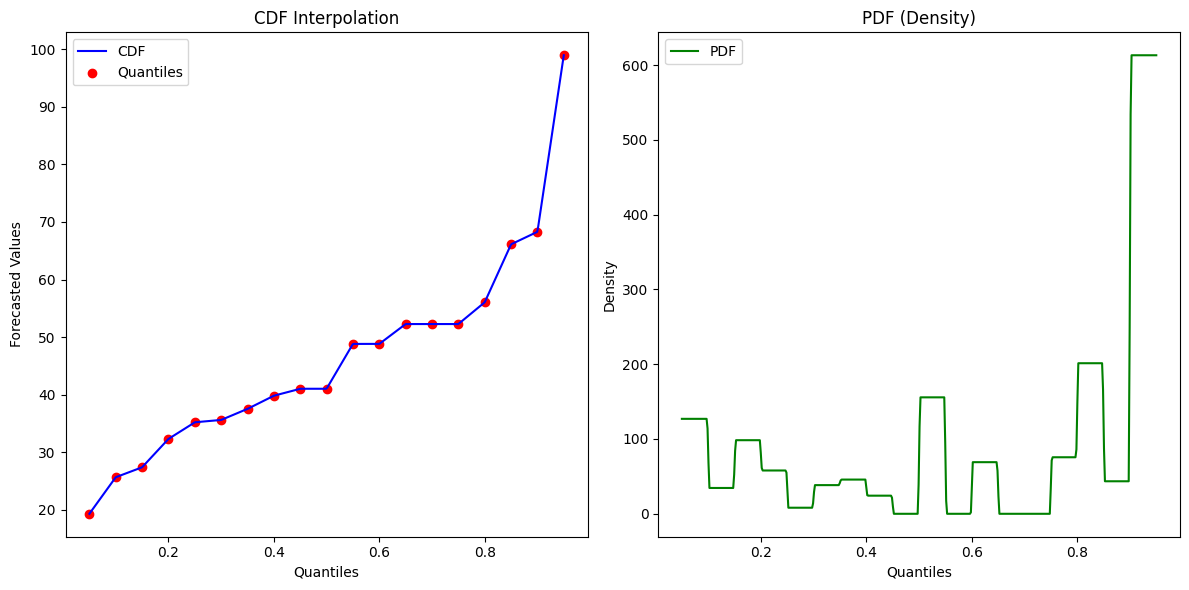

In [28]:
plot_cdf_pdf(post_process_quantiles(lgb_dfs[1]), quantiles, number=2)

### 4. Catboost

In [29]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 23.2 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor

quantile_str = str(quantiles).replace('[','').replace(']','')


cat_boost_dfs = {}


for i in range(1, num_test_sets + 1):

    cat_boost_dfs[i] = pd.DataFrame(columns=quantiles)

    df_train = get_train_i(i)
    df_test = get_test_i(i)


    # Use a catboost model with all quantiles
    model = CatBoostRegressor(
        loss_function=f'MultiQuantile:alpha={quantile_str}',
        random_state=42,
        verbose=0
    )

    # Fit the model
    model.fit(df_train[ml_features_list], df_train['pedestrians_count'])

    # Predict the quantiles
    preds = model.predict(df_test[ml_features_list])
    # Save the predictions
    cat_boost_dfs[i] = pd.DataFrame(preds, columns=quantiles)

cat_boost_dfs

{1:            0.05        0.10        0.15        0.20        0.25        0.30  \
 0     23.665448   24.944500   26.724922   28.636386   30.542279   32.882202   
 1     22.867676   24.798901   26.656460   28.503118   30.251305   32.071034   
 2     22.936094   24.181711   25.446032   27.083062   28.971571   30.853366   
 3     -3.386199   11.435040   12.392347   13.454097   14.928015   16.129073   
 4      9.382589   10.773576   11.858142   12.802988   13.440528   14.265119   
 ..          ...         ...         ...         ...         ...         ...   
 139  141.536250  174.434372  194.085927  206.464317  220.759991  235.527674   
 140   98.567026  113.998201  118.787363  123.490932  130.846999  138.142122   
 141   -1.153151   -0.300734    0.032098    0.407943    1.318829    1.918989   
 142    0.511283    0.222135    1.274944    1.509679    3.501074    5.652149   
 143   -0.720907   -0.216382   -0.098308    0.048285    0.064979    0.047780   
 
            0.35        0.40       

In [ ]:
for i in range(1, num_test_sets + 1):

    df_train = get_train_i(i)
    df_test = get_test_i(i)

    cat_boost_df = cat_boost_dfs[i]


    mql_cat, mae_cat = evaluate(cat_boost_df, horizon=HORIZON, i_test=i)
    eval_df.loc[len(eval_df)] = ['CatBoost', i, HORIZON, mql_cat, mae_cat]

eval_df

The multi quantile loss (MQL) is: 40.06
The mean absolute error (MAE) is: 108.14
The multi quantile loss (MQL) is: 85.93
The mean absolute error (MAE) is: 213.46
The multi quantile loss (MQL) is: 56.23
The mean absolute error (MAE) is: 138.20
The multi quantile loss (MQL) is: 105.12
The mean absolute error (MAE) is: 252.68
The multi quantile loss (MQL) is: 38.95
The mean absolute error (MAE) is: 104.86
The multi quantile loss (MQL) is: 56.36
The mean absolute error (MAE) is: 141.15
The multi quantile loss (MQL) is: 115.47
The mean absolute error (MAE) is: 285.12
The multi quantile loss (MQL) is: 35.73
The mean absolute error (MAE) is: 91.30
The multi quantile loss (MQL) is: 69.35
The mean absolute error (MAE) is: 176.76


,Method,Test Set,Horizon,MQL,MAE
0,Empirical Quantiles,1,48,246.096199,686.694444
1,Empirical Quantiles,2,48,339.443787,869.736111
2,Empirical Quantiles,3,48,256.211915,714.055556
3,Empirical Quantiles,4,48,279.418735,715.756944
4,Empirical Quantiles,5,48,269.941294,766.354167
5,Empirical Quantiles,6,48,200.275409,527.333333
6,Empirical Quantiles,7,48,446.761045,1150.006944
7,Empirical Quantiles,8,48,177.379496,456.562500
8,Empirical Quantiles,9,48,233.834481,656.243056
9,Quantile Regression,1,48,233.834481,126.503587


## 5. Random Forest

In [ ]:
pip install quantile-forest

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.1 MB/s eta 0:00:00


In [ ]:
from quantile_forest import RandomForestQuantileRegressor
from sklearn import datasets

random_forest_dfs = {}


for i in range(1, num_test_sets + 1):

    random_forest_dfs[i] = pd.DataFrame(columns=quantiles)

    df_train = get_train_i(i)
    df_test = get_test_i(i)


    # Use a catboost model with all quantiles
    model = RandomForestQuantileRegressor(
        #loss_function=f'MultiQuantile:alpha={quantile_str}',
        random_state=42,
        verbose=0
    )

    # Fit the model
    model.fit(df_train[ml_features_list], df_train['pedestrians_count'])

    # Predict the quantiles
    preds = model.predict(df_test[ml_features_list], quantiles)


    # Save the predictions
    random_forest_dfs[i] = pd.DataFrame(preds, columns=quantiles)

random_forest_dfs

{1:       0.05   0.10   0.15   0.20    0.25   0.30   0.35   0.40    0.45   0.50  \
 0     22.0   27.0   28.0   28.0   28.00   28.0   28.0   28.0   36.10   55.5   
 1     39.0   39.0   39.0   39.0   39.00   39.0   39.0   39.0   40.65   42.0   
 2     33.0   33.0   34.0   34.0   34.00   34.0   34.0   34.0   34.00   41.0   
 3     17.0   17.9   20.0   20.0   20.00   20.0   20.0   20.0   20.00   20.0   
 4     14.0   14.0   14.0   14.0   14.00   14.0   22.0   22.0   22.00   22.0   
 ..     ...    ...    ...    ...     ...    ...    ...    ...     ...    ...   
 139   49.0   49.0   56.0  110.0  179.25  185.0  210.0  240.0  240.00  240.0   
 140  117.0  123.0  128.0  129.0  129.00  129.0  135.0  135.0  135.00  139.5   
 141    0.0    0.0    0.0    0.0    0.00    0.0    0.0    0.0    0.00   17.0   
 142    0.0    0.0    0.0    0.0    0.00    0.0    0.0    8.0    8.00   11.0   
 143    0.0    0.0    0.0    0.0    0.00    0.0    0.0    0.0    0.00    0.0   
 
       0.55   0.60   0.65   0.70   

In [ ]:
for i in range(1, num_test_sets + 1):

    df_train = get_train_i(i)
    df_test = get_test_i(i)

    random_forest_df = random_forest_dfs[i]


    mql_rf, mae_rf = evaluate(random_forest_df, horizon=HORIZON, i_test=i)
    eval_df.loc[len(eval_df)] = ['RandomForest', i, HORIZON, mql_rf, mae_rf]

eval_df

The multi quantile loss (MQL) is: 51.62
The mean absolute error (MAE) is: 129.40
The multi quantile loss (MQL) is: 98.29
The mean absolute error (MAE) is: 238.18
The multi quantile loss (MQL) is: 68.27
The mean absolute error (MAE) is: 167.45
The multi quantile loss (MQL) is: 172.28
The mean absolute error (MAE) is: 401.59
The multi quantile loss (MQL) is: 41.70
The mean absolute error (MAE) is: 111.21
The multi quantile loss (MQL) is: 64.41
The mean absolute error (MAE) is: 157.30
The multi quantile loss (MQL) is: 123.69
The mean absolute error (MAE) is: 287.55
The multi quantile loss (MQL) is: 43.61
The mean absolute error (MAE) is: 106.18
The multi quantile loss (MQL) is: 79.24
The mean absolute error (MAE) is: 189.65


,Method,Test Set,Horizon,MQL,MAE
0,Empirical Quantiles,1,48,246.096199,686.694444
1,Empirical Quantiles,2,48,339.443787,869.736111
2,Empirical Quantiles,3,48,256.211915,714.055556
3,Empirical Quantiles,4,48,279.418735,715.756944
4,Empirical Quantiles,5,48,269.941294,766.354167
5,Empirical Quantiles,6,48,200.275409,527.333333
6,Empirical Quantiles,7,48,446.761045,1150.006944
7,Empirical Quantiles,8,48,177.379496,456.562500
8,Empirical Quantiles,9,48,233.834481,656.243056
9,Quantile Regression,1,48,233.834481,126.503587


## Get the feature importance of the model  

In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 12.3 MB/s eta 0:00:00


In [ ]:
# Plot feature importance using shapely
import shap

# Define lgbm model that predicts the median
model = lgb.LGBMRegressor(
            objective='quantile',
            alpha=0.5, # alpha Parameter gibt Quantil an
            random_state=42,
            verbose=-1
        )

# Train on all data
model.fit(df_hour[ml_features_list], df_hour['pedestrians_count'])

# Calculate SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer(df_hour[ml_features_list])

# Calculate the mean absolute SHAP values for each feature
shap_importance = pd.DataFrame({
    'feature': ml_features_list,
    'importance': np.abs(shap_values.values).mean(axis=0)
})

# Sort the features by importance
shap_importance = shap_importance.sort_values(by='importance', ascending=False)

# Display the ordered list of features by importance
print(shap_importance)

                     feature  importance
33  pedestrians_count_7d_lag  584.739211
5             weekday_Sunday   53.958697
36    location_Spiegelstraße   37.785318
22                   hour_13   26.733866
1                   holidays   24.646778
21                   hour_12   23.043052
4           weekday_Saturday   22.516346
35  location_Schönbornstraße   20.513776
20                   hour_11   18.267915
25                   hour_16   16.789650
24                   hour_15   14.951441
23                   hour_14   14.088230
26                   hour_17   10.134534
32                   hour_23    5.869622
29                   hour_20    5.217505
30                   hour_21    4.320328
2             weekday_Friday    3.905244
19                   hour_10    3.875029
27                   hour_18    3.523943
17                    hour_8    3.469930
31                   hour_22    3.380674
18                    hour_9    3.076399
34     location_Kaiserstraße    2.771271
28              

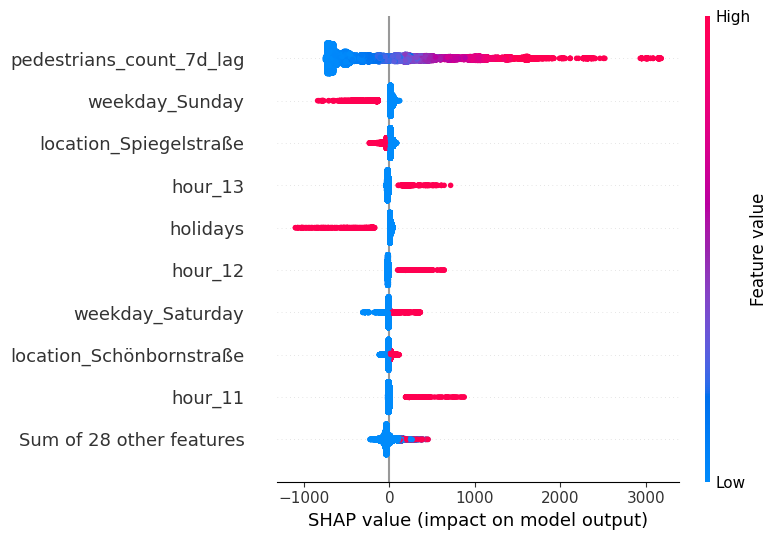

In [ ]:
# Plot feature importance using shapely
import shap

# Define lgbm model that predicts the median
model = lgb.LGBMRegressor(
            objective='quantile',
            alpha=0.5, # alpha Parameter gibt Quantil an
            random_state=42,
            verbose=-1
        )

# Train on all data
model.fit(df_hour[ml_features_list], df_hour['pedestrians_count'])

# Calculate shapley values and ensure it returns an Explanation object
explainer = shap.TreeExplainer(model)
shap_values = explainer(df_hour[ml_features_list]) # Call the explainer on the data


# Plot the shapley values using the Explanation object
shap.plots.beeswarm(shap_values, show=False)
# tight layout
plt.tight_layout()
# Save the plot to a file
plt.savefig('/content/drive/My Drive/BA/Hour_shap_beeswarm_plot_short.png')

In [ ]:
1/0

ZeroDivisionError: division by zero

### 6. Deep Learning: LSTM

In [ ]:
pip install NeuralForecast

In [ ]:
import torch
from neuralforecast.models import LSTM
from neuralforecast.losses.pytorch import MQLoss
from neuralforecast import NeuralForecast

# Konfiguriere das Gerät: Wenn CUDA verfügbar ist, wird es verwendet
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Definiere Modelle und verschiebe sie auf das GPU-Gerät
levels = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]


model_names = ['LSTM']

models = [
    LSTM(input_size=len(futr_exog_list*HORIZON), h=HORIZON,
        futr_exog_list = futr_exog_list,
        stat_exog_list=static_feature_list,
        scaler_type = 'robust',
        loss=MQLoss(level=levels),
        max_steps=400
        ).to(device)]

# Initialisiere das NeuralForecast-Objekt
nf = NeuralForecast(models=models, freq='H')

# Überprüfe, ob die GPU korrekt verwendet wird
print(f"Verwende Gerät: {device}")

In [ ]:
static_df = pd.DataFrame(
      columns=['unique_id', 'location_Kaiserstraße','location_Schönbornstraße','location_Spiegelstraße'],
      data=[['Kaiserstraße', 1, 0, 0 ], ['Schönbornstraße', 0, 1, 0], ['Spiegelstraße', 0, 0, 1]]
  )

static_df

In [ ]:
def format_nixta_output(nixta_pred, model_name, hi_or_lo='hi'):

  quantile_pred = nixta_pred.copy()


  quantile_pred.reset_index(drop=False, inplace=True)
  # Sort nixta_pred by date
  quantile_pred.sort_values(by=['ds', 'unique_id'], inplace=True)
  col_names = [f'{model_name}-{hi_or_lo}-{int(100*q)}' for q in quantiles]
  # Get the predictions
  quantile_pred = quantile_pred[col_names]

  # Rename the columns
  quantile_pred.columns = quantiles

  quantile_pred.reset_index(drop=True, inplace=True)

  return quantile_pred


In [ ]:
lstm_dfs_lo = {}
lstm_dfs_hi = {}
lstm_dfs = {}

for i in range(1, num_test_sets + 1):

    df_train = get_train_i(i)
    df_test = get_test_i(i)

    lstm_dfs[i] = pd.DataFrame(columns=quantiles)

    train_df_nixtla = format_dataset_for_nixtla(df_train)
    test_df_nixtla = format_dataset_for_nixtla(df_test)

    nf.fit(df=train_df_nixtla, static_df=static_df)

    quantile_estimates_lstm = nf.predict(futr_df=test_df_nixtla)
    quantile_estimates_lstm.sort_values(by='ds')

    lstm_dfs_hi[i] = format_nixta_output(quantile_estimates_lstm, 'LSTM', hi_or_lo='hi')

In [ ]:
test_df_nixtla

In [ ]:
for i in range(1, num_test_sets + 1):

    df_train = get_train_i(i)
    df_test = get_test_i(i)

    lstm_df_hi = lstm_dfs_hi[i]

    mql_lstm, mae_lstm = evaluate(lstm_df_hi, horizon=HORIZON, i_test=i)
    eval_df.loc[len(eval_df)] = ['LSTM', i, HORIZON, mql_lstm, mae_lstm]


eval_df

In [ ]:
eval_df

In [ ]:
eval_df.to_csv(f'/content/drive/My Drive/BA/eval_df_stundendaten_{SHORT_TIME_OR_LONG_TIME}.csv', index=False)